In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [28]:
X_train = pd.read_csv('dataset/X_train.csv', header=None)
X_test = pd.read_csv('dataset/X_test.csv', header=None)
y_train = pd.read_csv('dataset/y_train.csv', header=None)
y_test = pd.read_csv('dataset/y_test.csv', header=None)

In [29]:
X_train.head()
y = np.unique(y_train[0])
y

array([0, 1])

In [30]:
linear_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
rbf_model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [31]:
linear_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)

/Users/prashanthjaganathan/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/prashanthjaganathan/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [32]:
train_pred = linear_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f'Linear Model Train Accuracy: {train_accuracy}')

test_pred = linear_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f'Linear Model Test Accuracy: {test_accuracy}')

Linear Model Train Accuracy: 0.8625
Linear Model Test Accuracy: 0.75


In [33]:
train_pred = rbf_model.predict(X_train)
train_accuracy = accuracy_score(train_pred, y_train)
print(f'RBF Model Train Accuracy: {train_accuracy}')

test_pred = rbf_model.predict(X_test)
test_accuracy = accuracy_score(test_pred, y_test)
print(f'RBF Model Test Accuracy: {test_accuracy}')

RBF Model Train Accuracy: 0.95625
RBF Model Test Accuracy: 0.925


In [34]:
def plot_decision_boundary(clf, X, y, title):
    """
    Plots the decision boundary for a given classifier.
    Parameters:
    clf : trained SVM classifier.
    X : numpy array of shape (n_samples, 2). The input feature matrix. y : numpy array of shape (n_samples,). The target labels.
    """

    # Define the boundaries of the plot
    x_min, x_max = X[:][0].min() - 1, X[:][0].max() + 1
    y_min, y_max = X[:][1].min() - 1, X[:][1].max() + 1
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    # Predict class labels for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:][0], X[:][1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f'{title} SVM Model')
    plt.show()

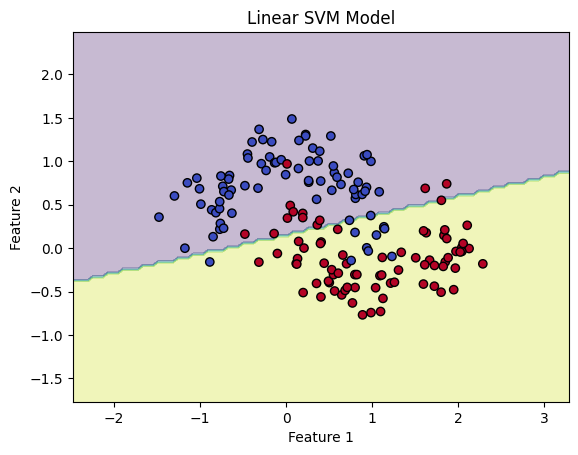

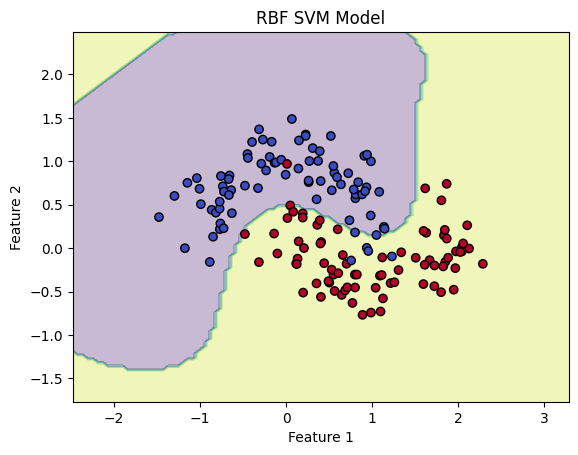

In [35]:
plot_decision_boundary(linear_model, X_train, y_train, 'Linear')
plot_decision_boundary(rbf_model, X_train, y_train, 'RBF')